In [192]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
cid = '2aa2856b7d494c97bea4fc401bb9e2f9'
secret = 'e8dbc041295f49a391978083e4c689f9'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [148]:
token = util.prompt_for_user_token('31m5chjshwymbyb34enj532hv3su', 
                                   scope='playlist-read-private', 
                                   client_id='2aa2856b7d494c97bea4fc401bb9e2f9', 
                                   client_secret='e8dbc041295f49a391978083e4c689f9', 
                                   redirect_uri='http://localhost:8889/callback')

In [149]:
sp = spotipy.Spotify(auth=token)

In [24]:
sp.user_playlist('31m5chjshwymbyb34enj532hv3su','https://open.spotify.com/playlist/0jijic3TlsproVUHrDSaTc?si=a3902f90d7e946a9')

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0jijic3TlsproVUHrDSaTc'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/0jijic3TlsproVUHrDSaTc?additional_types=track',
 'id': '0jijic3TlsproVUHrDSaTc',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b2737132f9afb43d7897ea6dcb42ab67616d0000b273770e58207598981690d4fd2eab67616d0000b27380bdf089d1ef494cd126bdb1ab67616d0000b273c7271d512653a480e223b658',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b2737132f9afb43d7897ea6dcb42ab67616d0000b273770e58207598981690d4fd2eab67616d0000b27380bdf089d1ef494cd126bdb1ab67616d0000b273c7271d512653a480e223b658',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b2737132f9afb43d7897ea6dcb42ab67616d0000b273770e58207598981690d4fd2eab67616d0000b27380bdf089d1ef494cd126bdb1ab67616d0000b273c7271d512653a480e223

In [19]:

def get_playlist_info(username, playlist_id):
 
    offset = 0
    tracks, uris, names, artists = [], [], [], []

    playlist_name = sp.user_playlist(username, playlist_id)['name']

  
    while True:
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset)
        tracks += results['items']
        if results['next'] is not None:
            offset += 100
        else:
            break
        
    for track in tracks:
        names.append(track['track']['name'])
        artists.append(track['track']['artists'][0]['name'])
        uris.append(track['track']['uri'])
    
    return playlist_name, names, artists, uris

In [ ]:
get_playlist_info()

In [55]:
def get_features_for_playlist(df, username, uri):
 
    playlist_name, names, artists, uris = get_playlist_info(username, uri)
    
    for name, artist, track_uri in zip(names, artists, uris):
       
        audio_features = sp.audio_features(track_uri)
        print(audio_features)
       
        feature_subset = [audio_features[0][col] for col in df.columns if col not in ["name", "artist", "track_URI", "playlist"]]
        
        #print(feature_subset)
      
        if(name == None):
            continue
        row = [name, artist, track_uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, playlist_name]
        print(row)
        df.loc[len(df.index)] = row
    return df

In [ ]:
get_features_for_playlist()

In [26]:
playlist_info = get_playlist_info('31m5chjshwymbyb34enj532hv3su','0jijic3TlsproVUHrDSaTc')
playlist_infoStandardScaler

('My Playlist #1',
 ['MEDIUS LOCUS ~EXORDIUM',
  'Perforation',
  'Heart (feat. 初音ミク)',
  'Acceleration (Breeze Remix)',
  'come to the surface (Deep Reflection Remix)',
  'Polaris',
  'The Endless Love (Original Mix)',
  'インカーネイション (Original Mix)',
  'Dreamscape (TeigakuP Remix)',
  'Inverse Relation (HSP Remix)',
  'Light Song - Hiroyuki ODA remix',
  'Light Song',
  'Pink or Black',
  'our music'],
 ['AVTechNO!',
  'Clean Tears',
  'Clean Tears',
  'Clean Tears',
  'Clean Tears',
  'Hiroyuki Oda',
  'HSP',
  'HSP',
  'Clean Tears',
  'Clean Tears',
  'livetune',
  'livetune',
  'livetune',
  'livetune'],
 ['spotify:track:3rdlSpUHpP4rxYAKSsILaM',
  'spotify:track:7bTI1JD4gZAJXccmHNndCy',
  'spotify:track:3sTKNq4PseeXoeP35E5NJ0',
  'spotify:track:207DIUqvLlPfYdYNSB3MRR',
  'spotify:track:0dMTNpI1Lygf55VmWSnoNk',
  'spotify:track:7vY0SkxUvdahT9IGPHI6bx',
  'spotify:track:3DjygsFAjgIrgK7Uo8gNhf',
  'spotify:track:69q2vVFeMPBoomX65AzDwo',
  'spotify:track:52MgHxF7mvQfVIS5TFZ4pm',
  'spot

In [65]:
playlist_data = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])
playlist_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [56]:
get_features_for_playlist(playlist_data,'31m5chjshwymbyb34enj532hv3su','0jijic3TlsproVUHrDSaTc')

[{'danceability': 0.519, 'energy': 0.958, 'key': 6, 'loudness': -2.522, 'mode': 1, 'speechiness': 0.0619, 'acousticness': 0.0241, 'instrumentalness': 0, 'liveness': 0.0724, 'valence': 0.17, 'tempo': 139.985, 'type': 'audio_features', 'id': '3rdlSpUHpP4rxYAKSsILaM', 'uri': 'spotify:track:3rdlSpUHpP4rxYAKSsILaM', 'track_href': 'https://api.spotify.com/v1/tracks/3rdlSpUHpP4rxYAKSsILaM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3rdlSpUHpP4rxYAKSsILaM', 'duration_ms': 290000, 'time_signature': 4}]
[0.519, 0.958, 6, -2.522, 1, 0.0619, 0.0241, 0, 0.0724, 0.17, 139.985]


NameError: name 'danceability' is not defined

In [79]:
playlist_name, names, artists, uris = get_playlist_info('31m5chjshwymbyb34enj532hv3su','0jijic3TlsproVUHrDSaTc')
r = list(zip(names, artists, uris))

In [80]:
meta_data_df = pd.DataFrame(columns = ['name','artists','music_uri'],data =r)

In [75]:
meta_data_df

,name,artists,music_uri
0,MEDIUS LOCUS ~EXORDIUM,AVTechNO!,spotify:track:3rdlSpUHpP4rxYAKSsILaM
1,Perforation,Clean Tears,spotify:track:7bTI1JD4gZAJXccmHNndCy
2,Heart (feat. 初音ミク),Clean Tears,spotify:track:3sTKNq4PseeXoeP35E5NJ0
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx
6,The Endless Love (Original Mix),HSP,spotify:track:3DjygsFAjgIrgK7Uo8gNhf
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh


In [81]:
def get_features_for_playlist(df, username, uri):
  
    # get all track metadata from given playlist
    playlist_name, names, artists, uris = get_playlist_info(username, uri)
    
    # iterate through each track to get audio features and save data into dataframe
    for name, artist, track_uri in zip(names, artists, uris):
        # print(json.dumps(track_uri, indent=4))              
        # ^ DEBUG STATEMENT ^
        
        # access audio features for given track URI via spotipy 
        audio_features = sp.audio_features(track_uri)
        #print(audio_features)
        # get relevant audio features
        feature_subset = [audio_features[0][col] for col in df.columns if col not in ["name", "artist", "track_URI", "playlist"]]
        #print(feature_subset)
        # compose a row of the dataframe by flattening the list of audio features
        row = [ *feature_subset]
        df.loc[len(df.index)] = row
    return df

In [150]:
feature_data = get_features_for_playlist(playlist_data,'31m5chjshwymbyb34enj532hv3su','0jijic3TlsproVUHrDSaTc')

In [158]:
feature_data[0:14]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985
1,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001
2,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023
3,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980
4,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001
5,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005
6,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004
7,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000
8,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980
9,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993


In [159]:
feature_data[14:28]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
14,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985
15,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001
16,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023
17,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980
18,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001
19,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005
20,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004
21,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000
22,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980
23,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993


In [163]:
feature_data = feature_data[0:14]

In [164]:
combined_df = pd.concat([meta_data_df,feature_data[0:14]],axis=1)

In [165]:
combined_df = combined_df[0:14]

In [166]:
combined_df

,name,artists,music_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,MEDIUS LOCUS ~EXORDIUM,AVTechNO!,spotify:track:3rdlSpUHpP4rxYAKSsILaM,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985
1,Perforation,Clean Tears,spotify:track:7bTI1JD4gZAJXccmHNndCy,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001
2,Heart (feat. 初音ミク),Clean Tears,spotify:track:3sTKNq4PseeXoeP35E5NJ0,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005
6,The Endless Love (Original Mix),HSP,spotify:track:3DjygsFAjgIrgK7Uo8gNhf,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993


In [167]:
feature_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985
1,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001
2,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023
3,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980
4,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001
5,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005
6,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004
7,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000
8,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980
9,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993


In [168]:
scaler = StandardScaler()
features_std = scaler.fit_transform(feature_data)

pca = PCA()
pca.fit(features_std)
e_variance_ratio =  pca.explained_variance_ratio_
print(e_variance_ratio)

[0.31804518 0.21677637 0.13093777 0.0836002  0.07962969 0.07466689
 0.04949213 0.02511971 0.01333589 0.00735597 0.00104021]


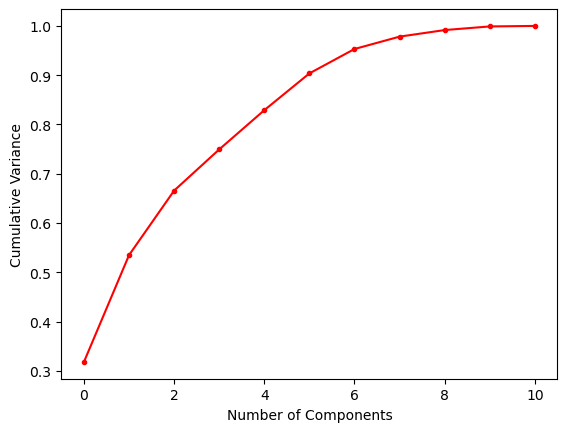

In [169]:

plt.plot(e_variance_ratio.cumsum(), marker = '.',color='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [170]:
pca = PCA(n_components=6)
optimal_components = pca.fit(features_std)

In [171]:
optimal_components

PCA(n_components=6)

Optimal number of clusters 3


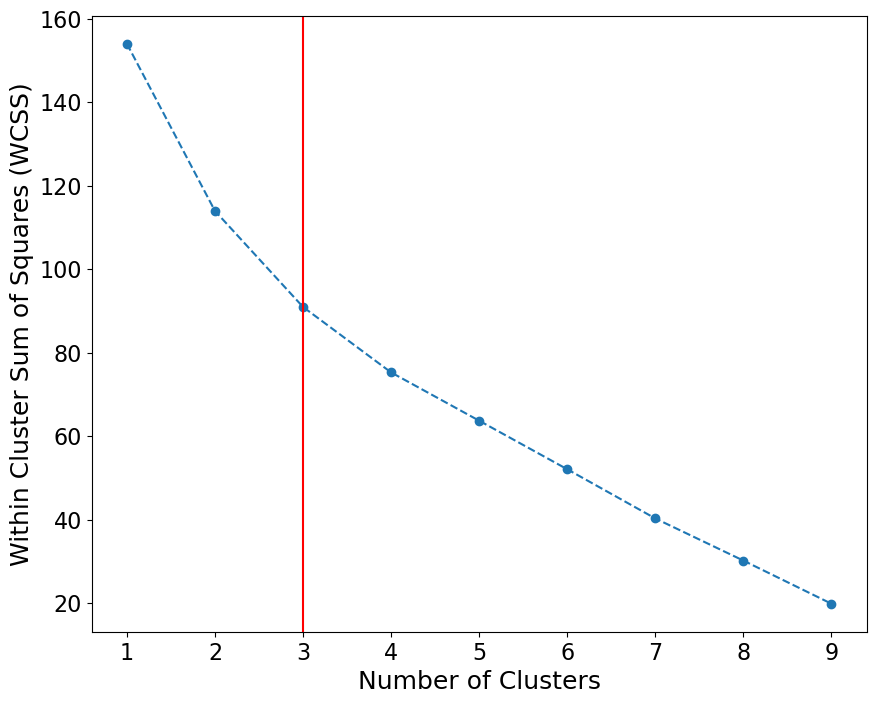

In [241]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(features_std)
    wcss.append(kmeans_pca.inertia_)
      
# programmatically locate the elbow
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
# visualize the curve in order to locate the elbow
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(3, color = 'red')
plt.show()


In [234]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(features_std)
combined_df['Cluster'] = kmeans_pca.labels_

In [220]:
combined_df

,name,artists,music_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
0,MEDIUS LOCUS ~EXORDIUM,AVTechNO!,spotify:track:3rdlSpUHpP4rxYAKSsILaM,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985,0
1,Perforation,Clean Tears,spotify:track:7bTI1JD4gZAJXccmHNndCy,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001,1
2,Heart (feat. 初音ミク),Clean Tears,spotify:track:3sTKNq4PseeXoeP35E5NJ0,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023,1
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980,0
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001,0
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005,0
6,The Endless Love (Original Mix),HSP,spotify:track:3DjygsFAjgIrgK7Uo8gNhf,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004,1
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000,0
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980,0
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993,0


In [179]:
combined_df

,name,artists,music_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
0,MEDIUS LOCUS ~EXORDIUM,AVTechNO!,spotify:track:3rdlSpUHpP4rxYAKSsILaM,0.519,0.958,6.0,-2.522,1.0,0.0619,0.024100,0.000000,0.0724,0.1700,139.985,2
1,Perforation,Clean Tears,spotify:track:7bTI1JD4gZAJXccmHNndCy,0.625,0.920,2.0,-7.363,1.0,0.0492,0.033800,0.868000,0.1140,0.2990,128.001,0
2,Heart (feat. 初音ミク),Clean Tears,spotify:track:3sTKNq4PseeXoeP35E5NJ0,0.623,0.861,2.0,-5.605,1.0,0.0332,0.025700,0.011600,0.1390,0.7250,100.023,0
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR,0.509,0.883,5.0,-3.898,0.0,0.0409,0.000745,0.000034,0.2760,0.0588,173.980,1
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk,0.524,0.967,7.0,-4.376,0.0,0.0372,0.006250,0.095400,0.1070,0.0702,132.001,1
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx,0.417,0.999,7.0,-4.052,0.0,0.0613,0.000068,0.966000,0.4240,0.2530,138.005,1
6,The Endless Love (Original Mix),HSP,spotify:track:3DjygsFAjgIrgK7Uo8gNhf,0.562,0.976,1.0,-6.168,1.0,0.0452,0.000277,0.674000,0.7030,0.4660,138.004,1
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo,0.524,0.993,6.0,-6.243,0.0,0.0734,0.000097,0.615000,0.1430,0.3980,138.000,1
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm,0.497,0.960,3.0,-6.488,0.0,0.0465,0.000102,0.082700,0.0593,0.3390,134.980,1
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh,0.506,0.968,2.0,-5.678,0.0,0.0523,0.000186,0.157000,0.3710,0.1590,137.993,1


In [138]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_pca.fit(features_std)
kmeans_pca.labels_[0:11]


array([2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [139]:
kmeans_pca.labels_[12:25]

array([2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
df['Cluster'] = kmeans_pca.labels_

In [180]:
features_std

array([[-0.17726637,  0.34567414,  0.79240582,  1.65839676,  1.        ,
         0.09124002,  1.23012253, -0.7156953 , -0.82822528, -0.74563428,
         0.36538526],
       [ 1.61227983, -0.37549701, -0.85110254, -1.58498588,  1.        ,
        -0.36317106,  2.0552086 ,  1.780485  , -0.59000007, -0.22022831,
        -0.46409687],
       [ 1.57851481, -1.49521012, -0.85110254, -0.40715761,  1.        ,
        -0.93565746,  1.3662192 , -0.68233621, -0.44683588,  1.51483328,
        -2.40061649],
       [-0.34609148, -1.07768998,  0.38152873,  0.73650159, -1.        ,
        -0.66014838, -0.75646358, -0.71559838,  0.33770387, -1.19854238,
         2.71837633],
       [-0.09285381,  0.51647784,  1.20328291,  0.41625022, -1.        ,
        -0.79253586, -0.28820597, -0.44134553, -0.63008604, -1.15211115,
        -0.18723368],
       [-1.89928252,  1.12377987,  1.20328291,  0.63332437, -1.        ,
         0.06977178, -0.81408351,  2.06231181,  1.18523586, -0.40758238,
         0.228

In [183]:
features_std_T = features_std.T
cov_matrix = np.cov(features_std_T)
cov_matrix

array([[ 1.07692308, -0.28566078, -0.76436405, -0.47483398,  0.25583498,
        -0.41861799,  0.68732568, -0.04518967, -0.0153355 ,  0.67958902,
        -0.43299172],
       [-0.28566078,  1.07692308,  0.31443594,  0.04407048, -0.39562223,
         0.31303291, -0.15005709,  0.44081667,  0.25664657, -0.13918125,
         0.17320986],
       [-0.76436405,  0.31443594,  1.07692308,  0.52932759, -0.09481779,
         0.58336074, -0.23406042, -0.00418351, -0.39513206, -0.69727864,
         0.25639223],
       [-0.47483398,  0.04407048,  0.52932759,  1.07692308,  0.16223871,
         0.15919363,  0.12166132, -0.4274225 , -0.19313885, -0.22027741,
         0.25963597],
       [ 0.25583498, -0.39562223, -0.09481779,  0.16223871,  1.07692308,
         0.28156422,  0.57867585, -0.08204662, -0.1357637 ,  0.14756483,
        -0.47937265],
       [-0.41861799,  0.31303291,  0.58336074,  0.15919363,  0.28156422,
         1.07692308, -0.06128479, -0.0967219 , -0.25255032, -0.17933586,
        -0.007

In [184]:
values,vectors = np.linalg.eig(cov_matrix)

In [186]:
values

array([3.76761217, 2.56796625, 1.55110902, 0.01232246, 0.08713993,
       0.157979  , 0.2975719 , 0.58629135, 0.88451543, 0.99034082,
       0.94330553])

In [187]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [189]:
Vsorted, sorted_matrix = eigsort(vectors,values)

In [191]:
sorted_matrix

array([[3.76761217, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 2.56796625, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.55110902, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.99034082, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.94330553,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.88451543, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [235]:
p1 = features_std.dot(sorted_matrix.T[0])
p2 = features_std.dot(sorted_matrix.T[1])
component_df = pd.DataFrame(p1,columns=['pc1'])
component_df['pc2'] = p2
component_df['cluster'] = kmeans_pca.labels_

In [236]:
component_df

,pc1,pc2,cluster
0,-0.667871,0.887680,2
1,6.074445,-0.964264,0
2,5.947232,-3.839649,0
3,-1.303938,-2.767471,1
4,-0.349837,1.326298,1
5,-7.155760,2.885829,1
6,2.067220,1.764916,1
7,-0.349837,2.593417,1
8,-2.067220,0.985150,1
9,-1.494759,1.375033,1


In [217]:
p1c = features_std.dot(sorted_matrix.T[0])
p2c = features_std.dot(sorted_matrix.T[1])
centroid_df = pd.DataFrame(p1,columns=['pc1'])
centroid_df['pc2'] = p2


In [218]:
centroid_df

,pc1,pc2
0,-0.667871,0.887680
1,6.074445,-0.964264
2,5.947232,-3.839649
3,-1.303938,-2.767471
4,-0.349837,1.326298
5,-7.155760,2.885829
6,2.067220,1.764916
7,-0.349837,2.593417
8,-2.067220,0.985150
9,-1.494759,1.375033


In [216]:
cents = kmeans_pca.cluster_centers_

/home/b/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

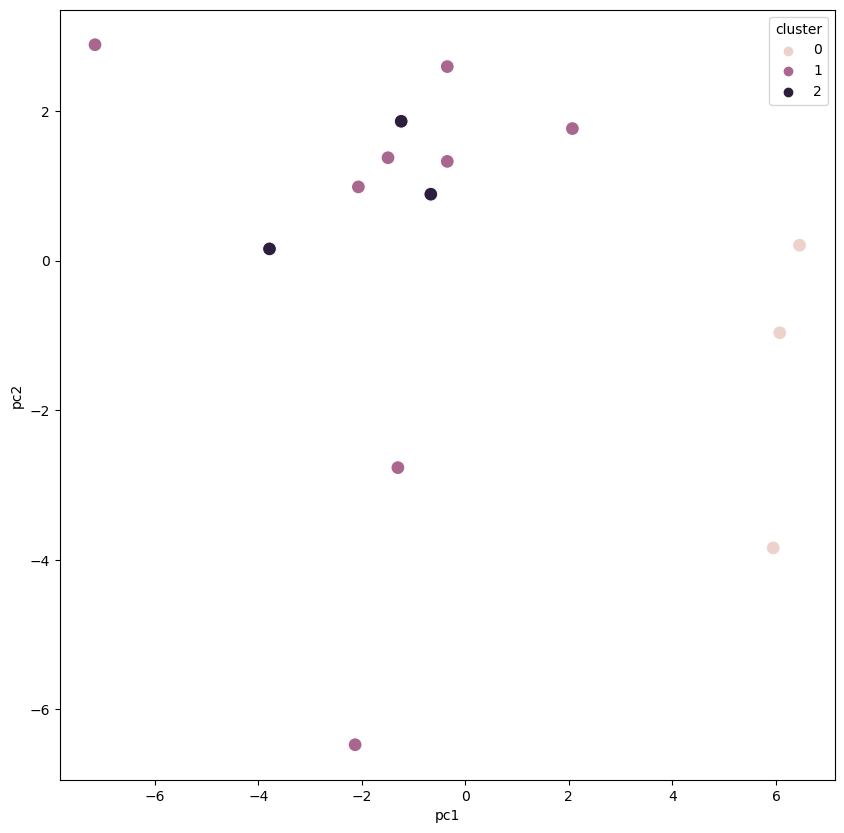

In [238]:
plt.figure(figsize=(10, 10))
sns.scatterplot(component_df['pc1'],component_df['pc2'], hue=component_df['cluster'], s=100)

In [239]:
pd.concat([meta_data_df,component_df],axis=1).sort_values('cluster')

,name,artists,music_uri,pc1,pc2,cluster
1,Perforation,Clean Tears,spotify:track:7bTI1JD4gZAJXccmHNndCy,6.074445,-0.964264,0
2,Heart (feat. 初音ミク),Clean Tears,spotify:track:3sTKNq4PseeXoeP35E5NJ0,5.947232,-3.839649,0
10,Light Song - Hiroyuki ODA remix,livetune,spotify:track:6fpECq2gyhlhDYXcCAHxTN,6.456086,0.205385,0
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR,-1.303938,-2.767471,1
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk,-0.349837,1.326298,1
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx,-7.155760,2.885829,1
6,The Endless Love (Original Mix),HSP,spotify:track:3DjygsFAjgIrgK7Uo8gNhf,2.067220,1.764916,1
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo,-0.349837,2.593417,1
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm,-2.067220,0.985150,1
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh,-1.494759,1.375033,1


/home/b/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

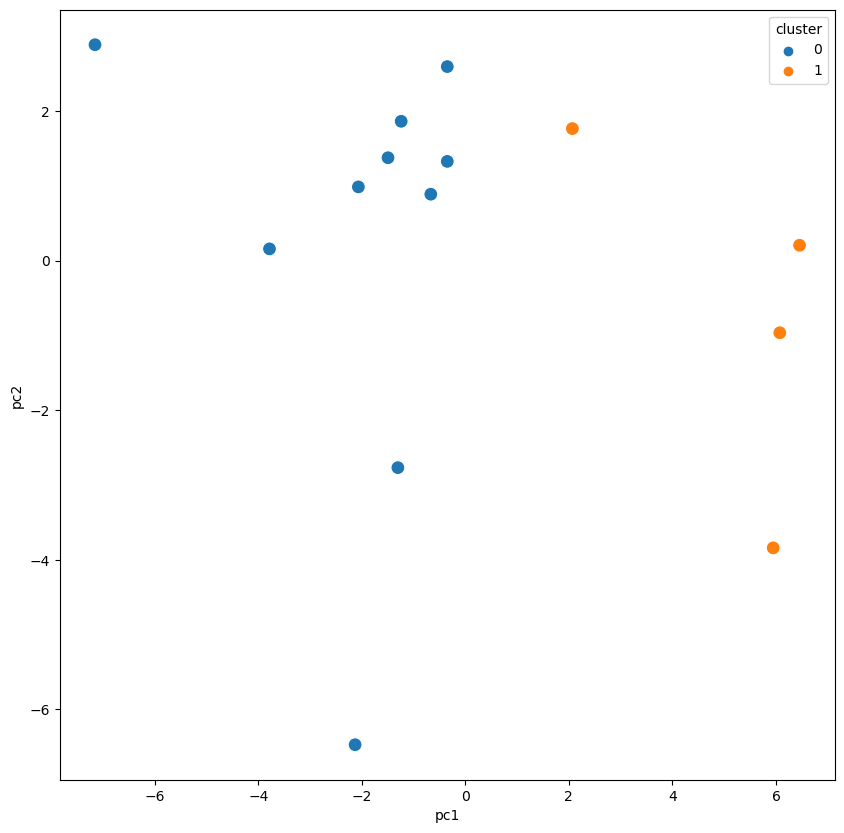

In [222]:
plt.figure(figsize=(10, 10))
sns.scatterplot(component_df['pc1'],component_df['pc2'], hue=component_df['cluster'], s=100)

In [233]:
pd.concat([meta_data_df,component_df],axis=1).sort_values('cluster')

,name,artists,music_uri,pc1,pc2,cluster
0,MEDIUS LOCUS ~EXORDIUM,AVTechNO!,spotify:track:3rdlSpUHpP4rxYAKSsILaM,-0.667871,0.887680,0
3,Acceleration (Breeze Remix),Clean Tears,spotify:track:207DIUqvLlPfYdYNSB3MRR,-1.303938,-2.767471,0
4,come to the surface (Deep Reflection Remix),Clean Tears,spotify:track:0dMTNpI1Lygf55VmWSnoNk,-0.349837,1.326298,0
5,Polaris,Hiroyuki Oda,spotify:track:7vY0SkxUvdahT9IGPHI6bx,-7.155760,2.885829,0
7,インカーネイション (Original Mix),HSP,spotify:track:69q2vVFeMPBoomX65AzDwo,-0.349837,2.593417,0
8,Dreamscape (TeigakuP Remix),Clean Tears,spotify:track:52MgHxF7mvQfVIS5TFZ4pm,-2.067220,0.985150,0
9,Inverse Relation (HSP Remix),Clean Tears,spotify:track:0u0ZyrLLEwz3KPqikEr4Sh,-1.494759,1.375033,0
11,Light Song,livetune,spotify:track:1d6EatnCY8nH2YltbnU0Du,-2.130826,-6.471358,0
12,Pink or Black,livetune,spotify:track:1FHxUuZIqbJRDqtl9FnBbu,-1.240332,1.862386,0
13,our music,livetune,spotify:track:4HfGSKj8g9Gxb10L9PjQHh,-3.784602,0.156649,0
